In [25]:
#1. 使用LSTM模型进行乘客的数目预测
#•数据集 international-airline-passengers.csv
#•（可以不在意精度和loss）


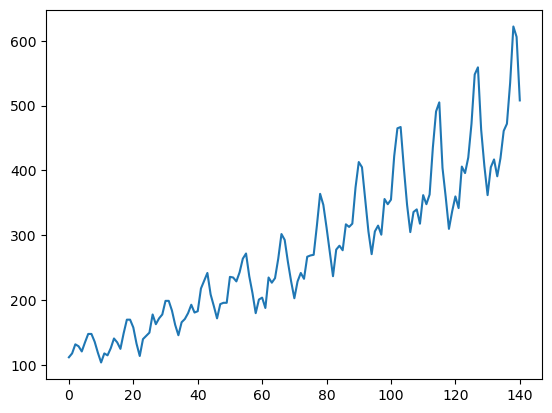

In [39]:
#（1）数据读取和预处理
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model

# 读取数据
dataframe = pd.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
# 数据可视化
plt.plot(dataset)
plt.show()

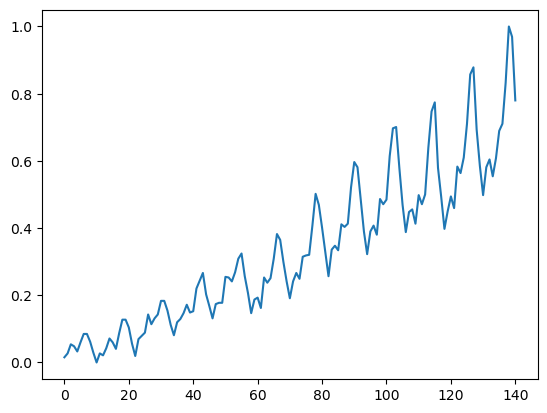

In [40]:
#（2）数据预处理

# 将整型变为float
dataset = dataset.astype('float32')
# 对数据进行归一化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# 数据可视化
plt.plot(dataset)
plt.show()

In [42]:
#（3）划分训练集和测试集

# 在这里我们设置时序数据的前65%为训练数据 后35%为测试数据
train_size = int(len(dataset) * 0.65)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

#处理数据
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

In [46]:
#（4）构建基于LSTM的神经网络模型，并编译
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# 创建并拟合LSTM网络
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') #损失函数为mean_squared_error 可用损失函数（MSE）
model.summary() #显示模型

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4)                 96        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [47]:
#训练神经网络
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save(os.path.join("DATA","Test" + ".h5"))

Epoch 1/100
89/89 - 1s - loss: 0.0150 - 1s/epoch - 15ms/step
Epoch 2/100
89/89 - 0s - loss: 0.0072 - 110ms/epoch - 1ms/step
Epoch 3/100
89/89 - 0s - loss: 0.0063 - 101ms/epoch - 1ms/step
Epoch 4/100
89/89 - 0s - loss: 0.0056 - 99ms/epoch - 1ms/step
Epoch 5/100
89/89 - 0s - loss: 0.0049 - 93ms/epoch - 1ms/step
Epoch 6/100
89/89 - 0s - loss: 0.0043 - 97ms/epoch - 1ms/step
Epoch 7/100
89/89 - 0s - loss: 0.0037 - 99ms/epoch - 1ms/step
Epoch 8/100
89/89 - 0s - loss: 0.0032 - 109ms/epoch - 1ms/step
Epoch 9/100
89/89 - 0s - loss: 0.0028 - 102ms/epoch - 1ms/step
Epoch 10/100
89/89 - 0s - loss: 0.0024 - 97ms/epoch - 1ms/step
Epoch 11/100
89/89 - 0s - loss: 0.0022 - 97ms/epoch - 1ms/step
Epoch 12/100
89/89 - 0s - loss: 0.0020 - 103ms/epoch - 1ms/step
Epoch 13/100
89/89 - 0s - loss: 0.0019 - 104ms/epoch - 1ms/step
Epoch 14/100
89/89 - 0s - loss: 0.0019 - 112ms/epoch - 1ms/step
Epoch 15/100
89/89 - 0s - loss: 0.0018 - 104ms/epoch - 1ms/step
Epoch 16/100
89/89 - 0s - loss: 0.0019 - 109ms/epoch - 1m

In [48]:
#进行预测

#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

2/2 [==============================] - 0s 2ms/step


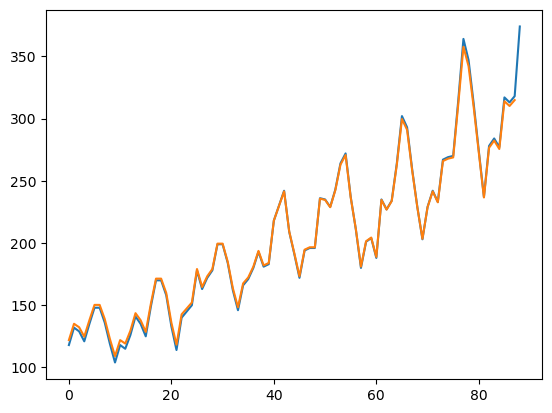

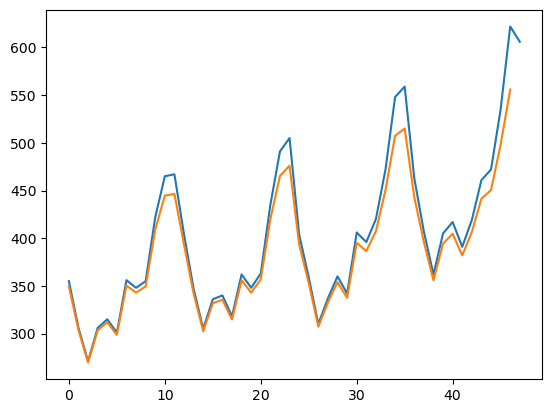

In [49]:
#结果数据可视化
plt.plot(trainY)
plt.plot(trainPredict[1:])
plt.show()
plt.plot(testY)
plt.plot(testPredict[1:])
plt.show()